In [ ]:
from autograph import autograph
import matplotlib.pyplot as plt

def draw_adjacency_matrix(
    graph: autograph.KnowledgeGraph,
    iteration_number: int,
    split_point: int | None = None
):
    matrix = graph.as_matrix()
    plt.imshow(matrix, cmap="Greys", interpolation="none")

    if split_point:
        split_point = split_point * len(matrix) / graph.num_vertices()
        plt.axvline(x = split_point, color = "red")
        
    plt.title(f"Iteration {iteration_number}")
    plt.show()

In [ ]:
import math

def show_progression_images(
    graph: autograph.KnowledgeGraph,
    num_iterations: int,
    shuffle_seed: int,
    factor: float
):
    graph.shuffle_vertex_ids(shuffle_seed)
    draw_adjacency_matrix(graph, 0)

    for i in range(num_iterations):
        graph.cluster(factor)
        densities = graph.split_density()

        draw_adjacency_matrix(graph, i + 1)

        plt.plot(densities)
        plt.title(f"Iteration {i + 1} densities")
        plt.show()

In [3]:
builder = autograph.GraphBuilder(0)
builder.add_dense_cluster(100_000, 0.001)
builder.add_dense_cluster(100_000, 0.001)
builder.add_random_link(0, 1)
graph = builder.finalize_graph()

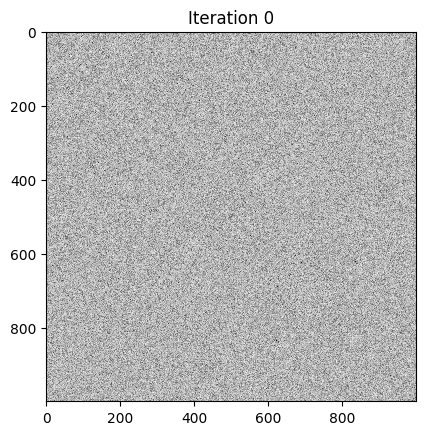

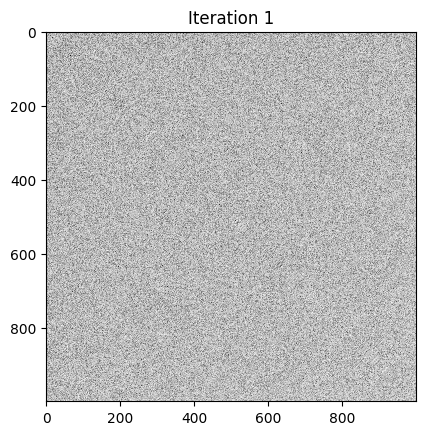

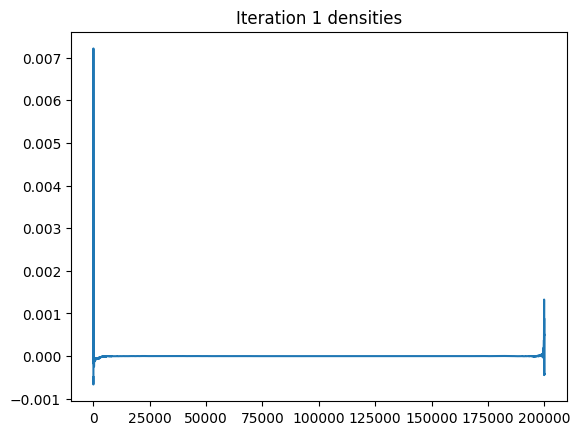

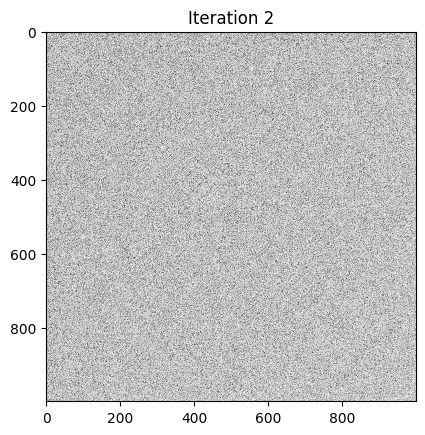

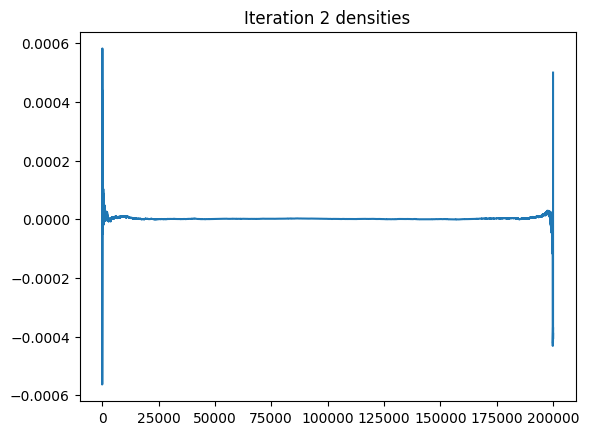

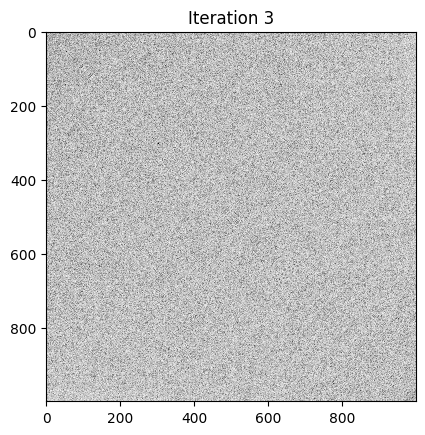

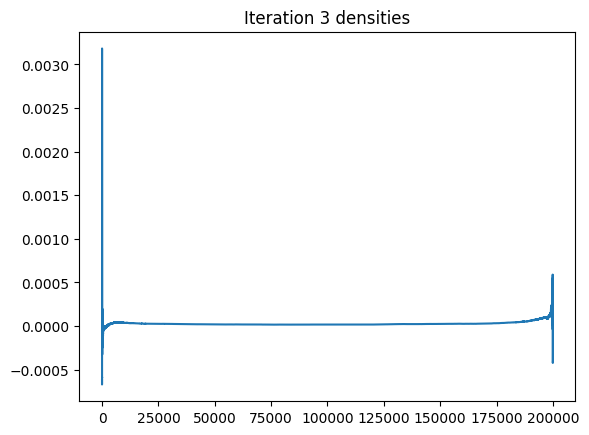

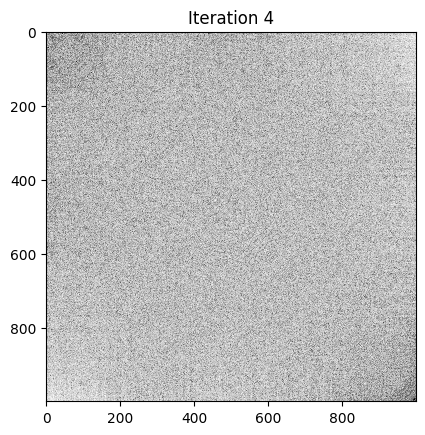

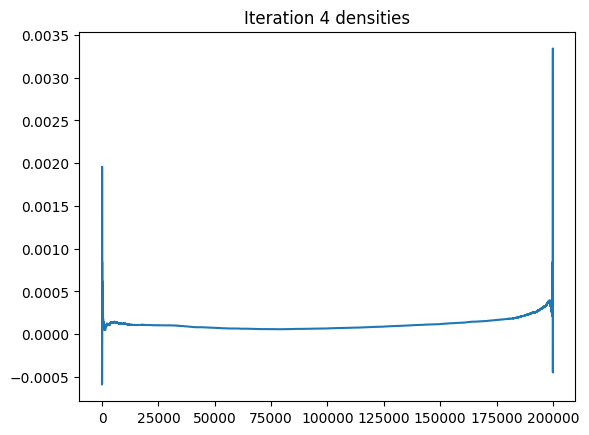

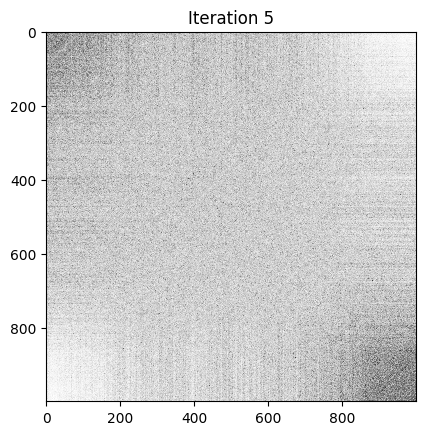

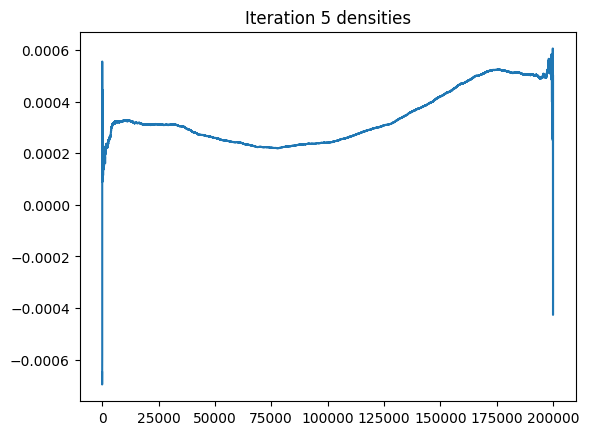

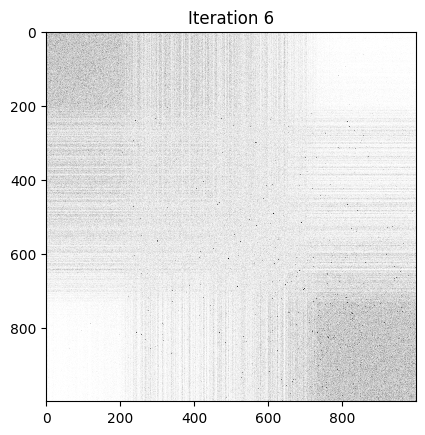

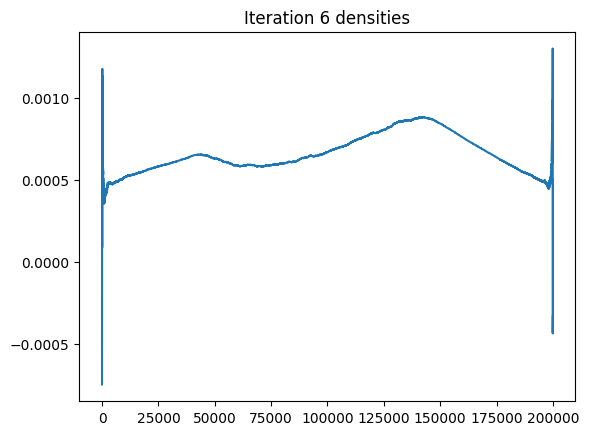

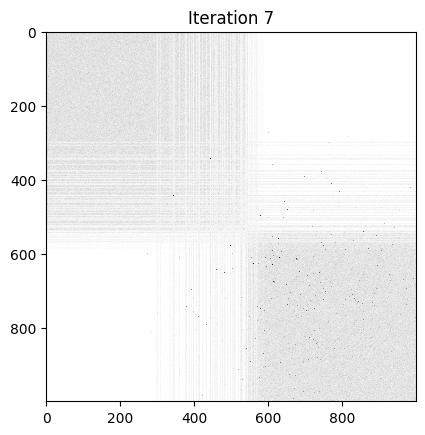

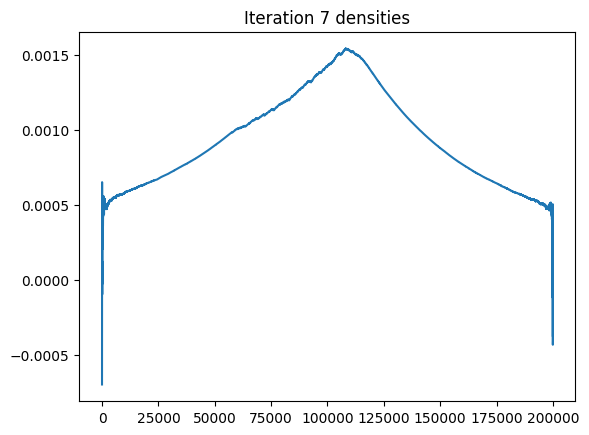

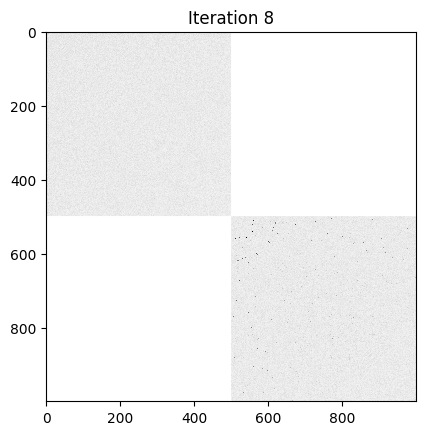

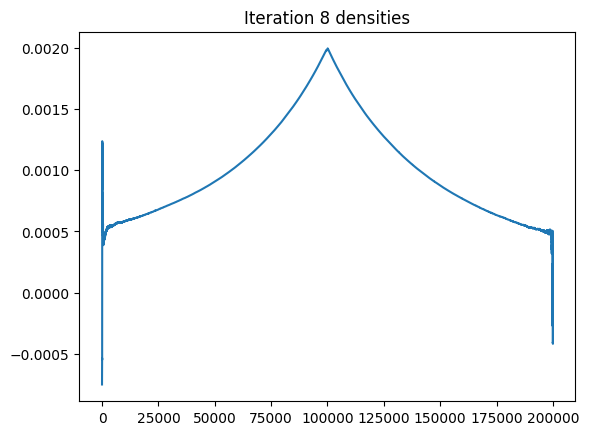

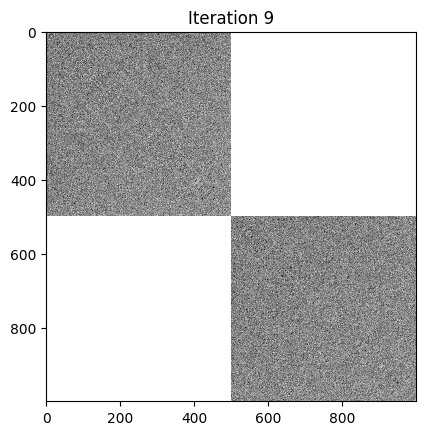

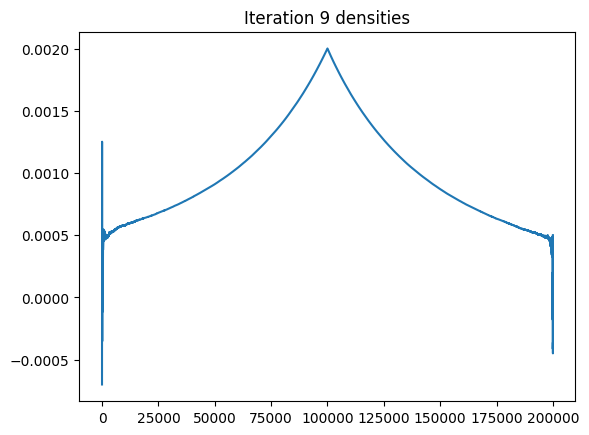

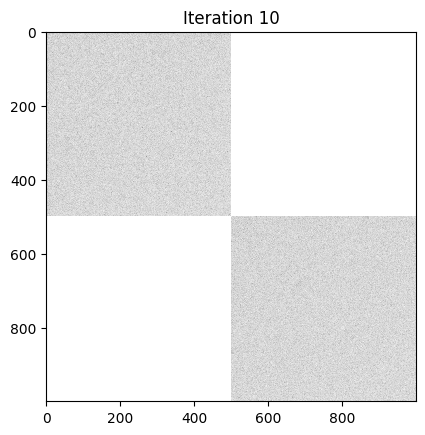

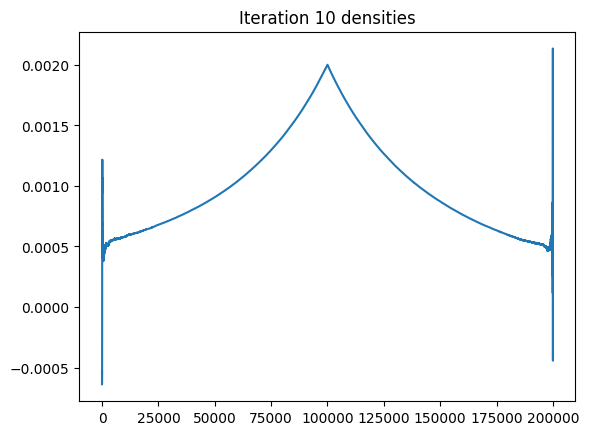

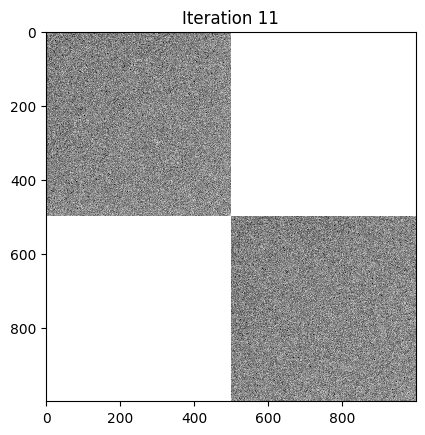

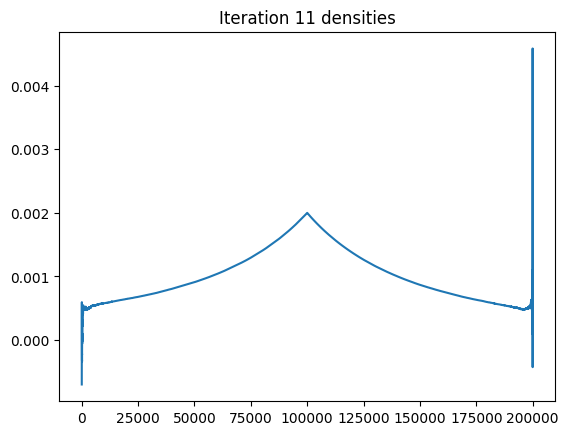

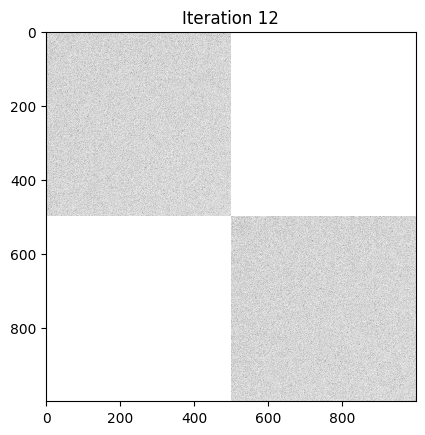

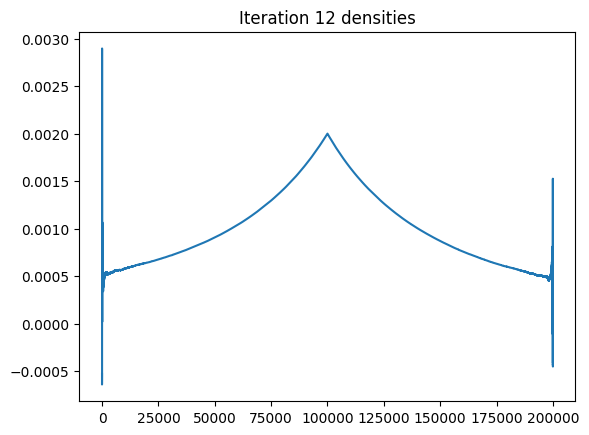

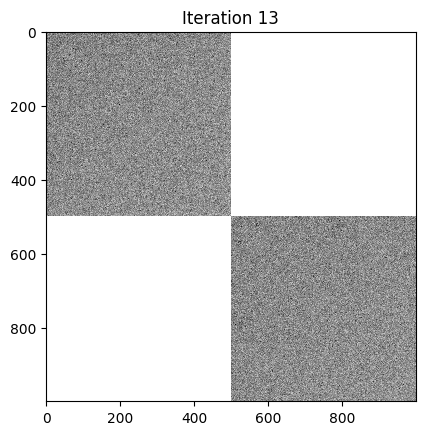

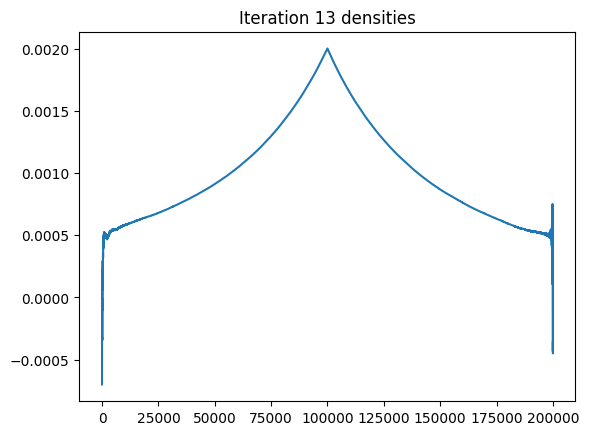

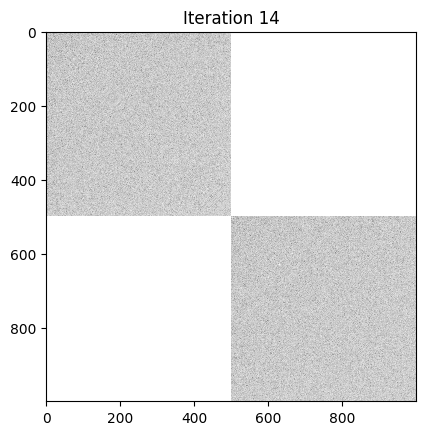

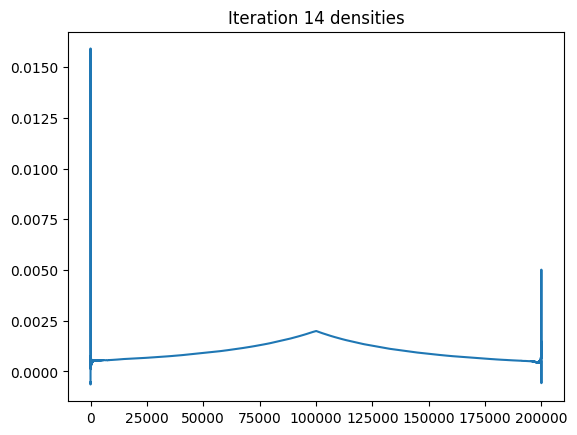

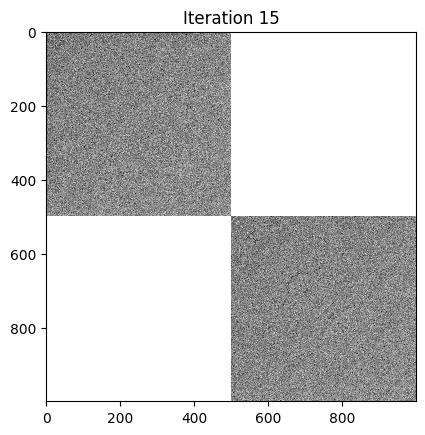

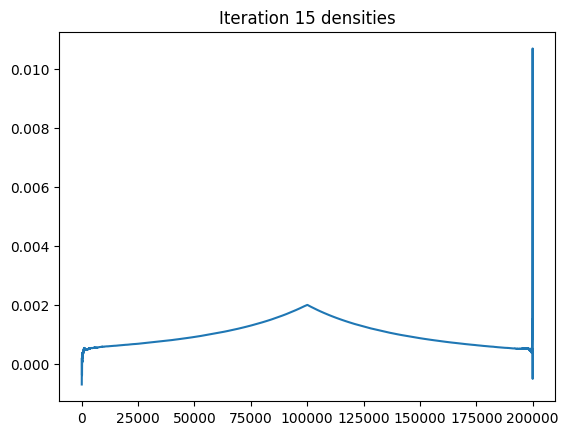

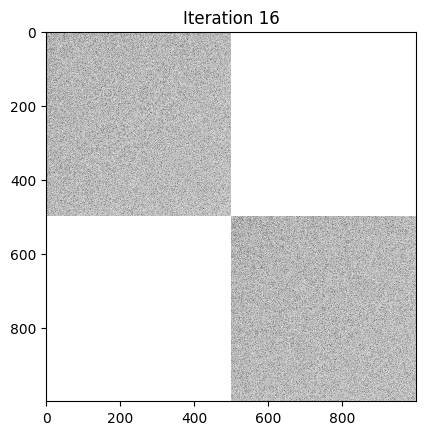

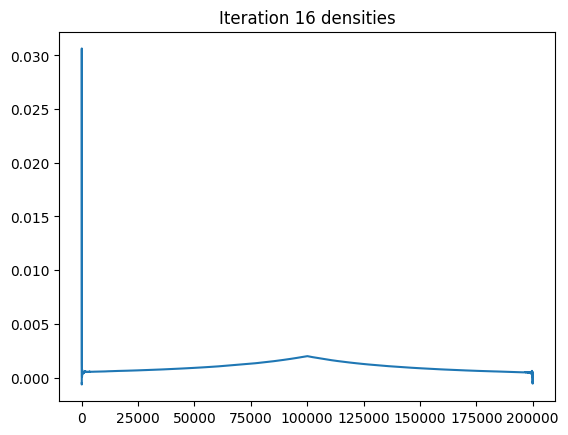

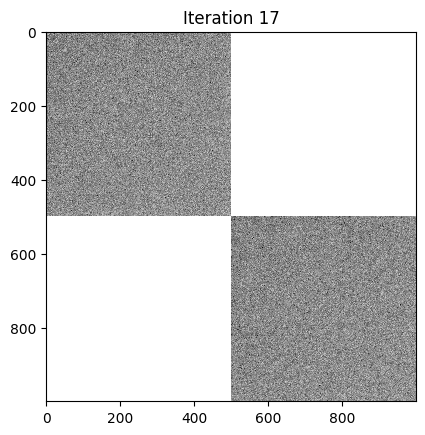

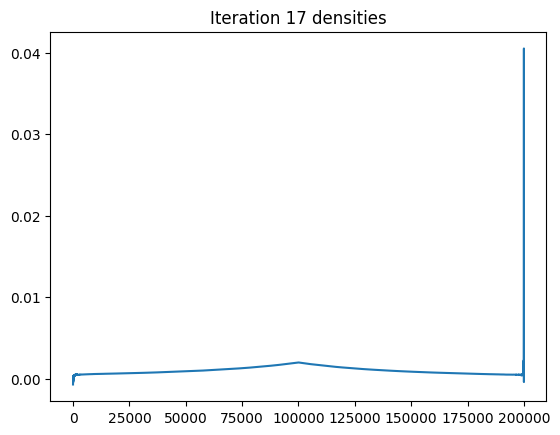

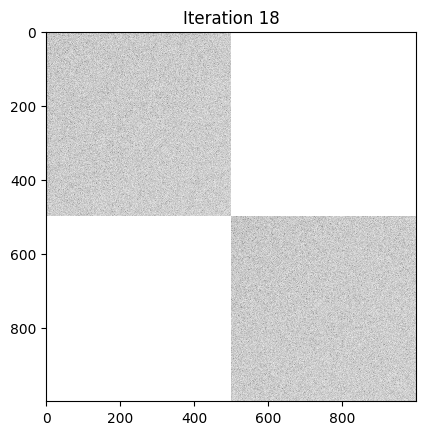

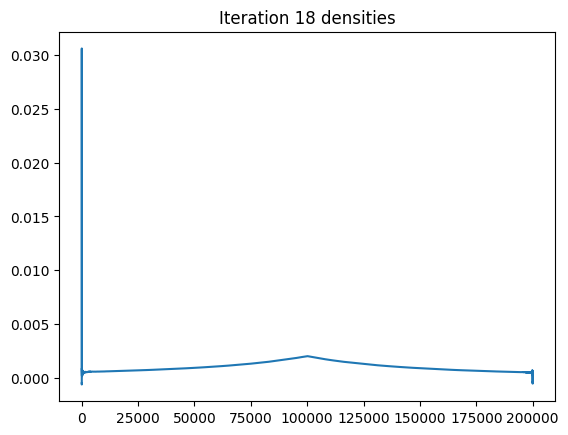

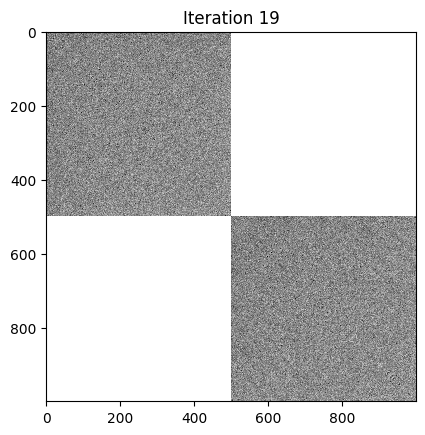

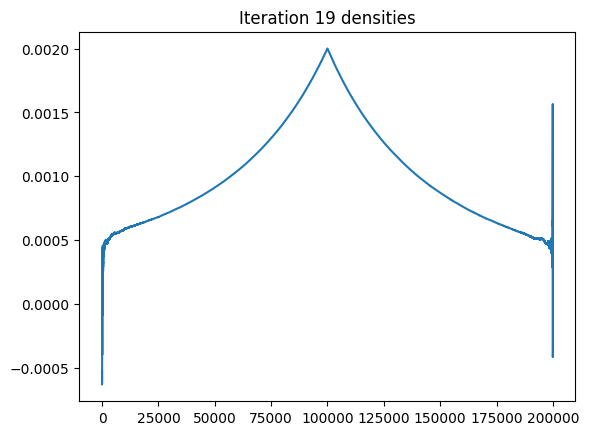

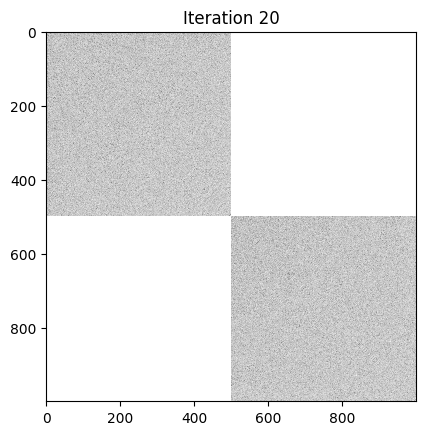

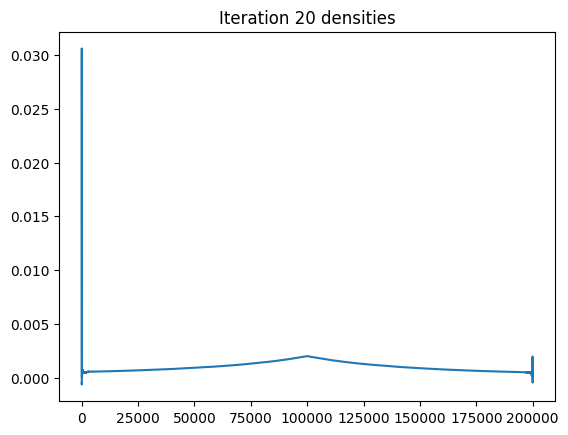

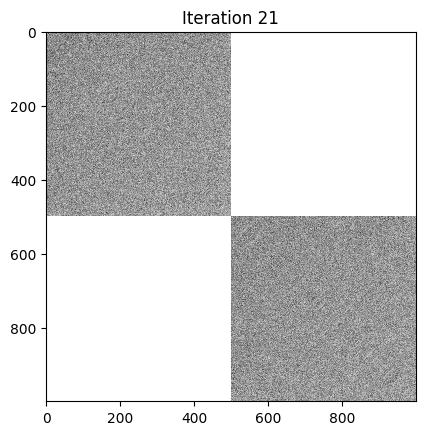

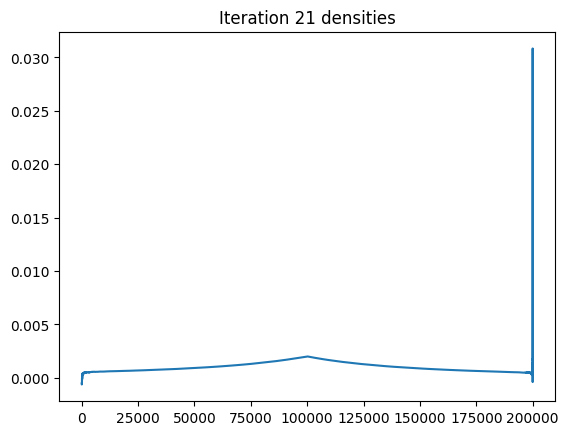

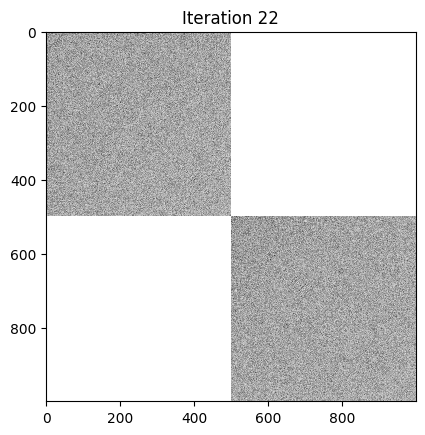

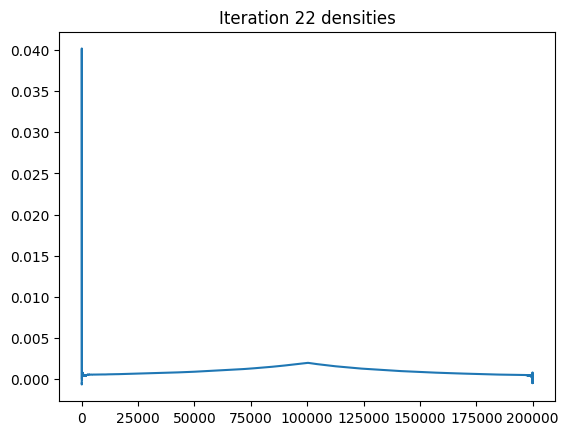

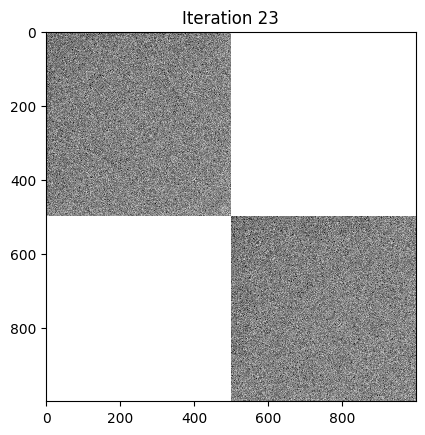

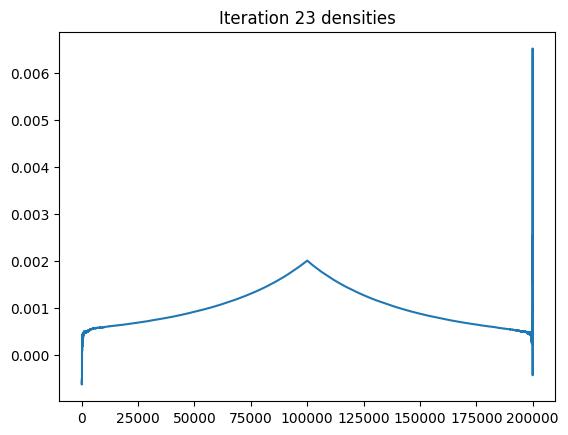

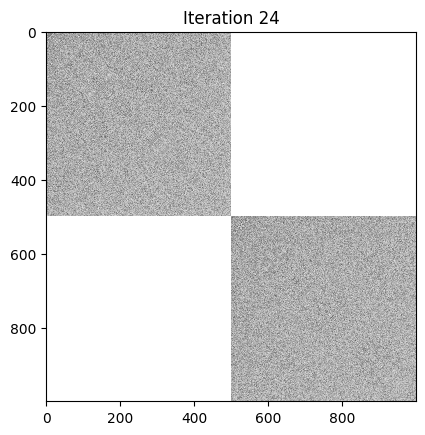

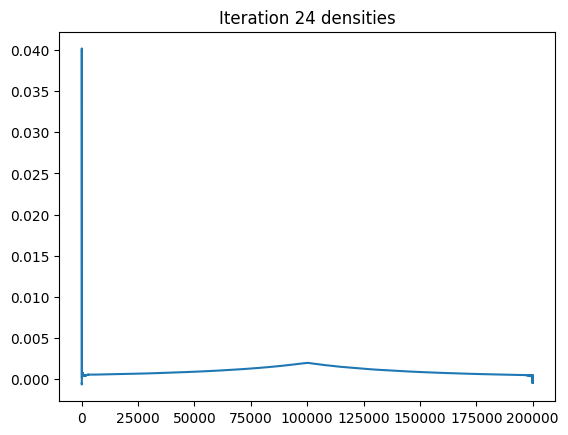

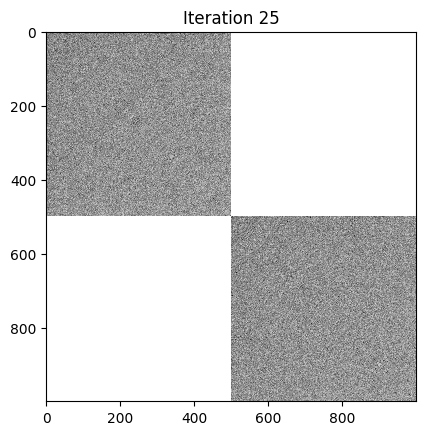

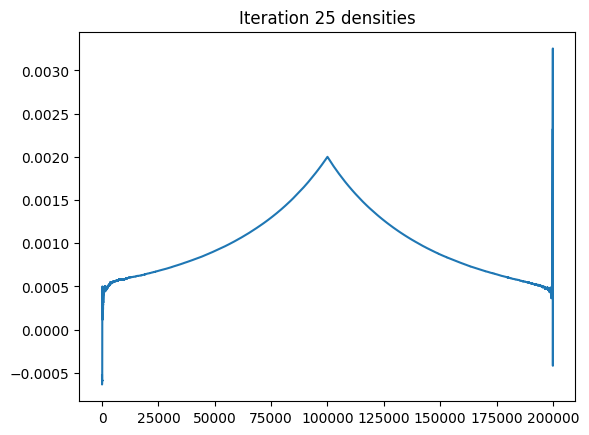

In [4]:
show_progression_images(graph, 25, 0, 0.001)